# Assignment 1

Due Friday 5th August 23:59

In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import CSV

In [31]:
import csv

with open("data.csv", 'r') as data:
    header = csv.reader(data).__next__()

# remove unnamed row.
houses = pd.read_csv('data.csv', usecols=header[1:])

# Data Exploration

There are 1728 rows and 16 features. There are no missing values from the dataset.

In [28]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


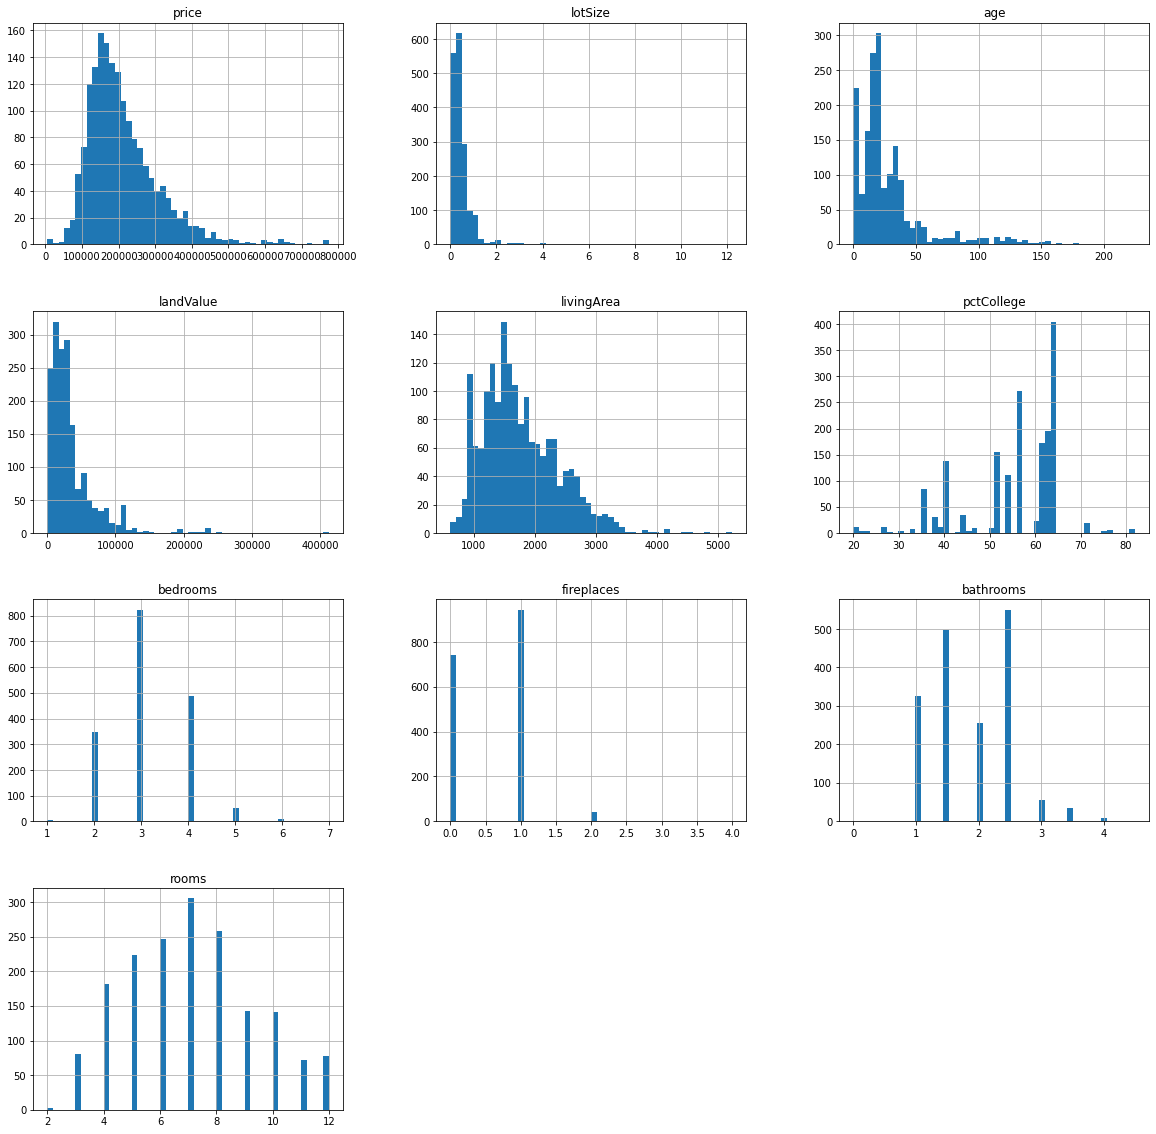

In [29]:
houses.hist(bins = 50, figsize = (20,20))
fig = plt.gcf() 
fig.savefig('hist.pdf', bbox_inches = 'tight')

In [30]:
houses.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [ ]:
from sklearn.compose import make_column_selector as selector

my_selector = selector(dtype_include=object)
categorical = my_selector(houses)

def unique_values(df, features):
    [print("Feature:", feature, df[feature].unique()) for feature in features]

unique_values(houses, categorical)


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(houses, 
                                       test_size = 0.2,
                                      random_state = 0)

In [ ]:
train_set.head()

In [ ]:
test_set.head()

# Discover and visualize data

In [ ]:
houses = train_set.copy()

In [ ]:
corr_matrix = houses.corr()
corr_matrix["price"].sort_values(ascending = False)

In [ ]:
houses.plot(kind = "scatter", x = "bathrooms", y = "price",
           alpha = 0.4)

In [ ]:
houses.plot(kind = "scatter", x = "landValue", y = "livingArea",
           alpha = 0.4,
           label = "Number of bathrooms",
           figsize = (10,7),
           c = "price", 
           cmap = plt.get_cmap("jet"))

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price", "livingArea", "bathrooms", 
              "landValue", "rooms", "bedrooms", 
              "fireplaces"]
scatter_matrix(houses[attributes], figsize = (15,15))
plt.show()

## Prepare the data for machine learning algorithms

Separate the predictors and the labels since we don't
necessarily want to apply the same transformations
to the predictors and the target values.

In [ ]:
X_train = train_set.drop("price", axis = 1) # drop labels for the training set
y_train = train_set["price"].copy()  # save the labels

In [ ]:
X_train.head(5)

In [ ]:
y_train.head(5)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
data_transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), # replace missing values with median
    ('std_scaler', StandardScaler()) #standardizes data
])
data_transform_pipeline

In [ ]:
# only numerical allowed?
X_train_prepared = data_transform_pipeline.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

In [ ]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = data_transform_pipeline.transform(some_data)

print("predictions:", lin_reg.predict(some_data_prepared))
